In [56]:
from utils import *
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('dark_background')
from scipy.interpolate import interp1d
import scipy

In [57]:
def compute_injection_credible_level (x, prob_x, x_inj):    

    credible_level = np.sum(prob_x[x<x_inj])/np.sum(prob_x)
    credible_level = np.array(credible_level)
    credible_level[credible_level>0.5] = 1 - credible_level[credible_level>0.5]
    credible_level *= 2
    return credible_level

def make_pp_plot_data (credible_levels, resolution = 1000):

    x_values = np.linspace(0, 1, 1001)
    y_values = np.quantile(np.array(credible_levels), x_values)
    
    return x_values, y_values

def get_pp_plot_errorbar_data (N, confidence_interval = 0.68, resolution = 1000):
    x_values = np.linspace(0, 1, 1001)

    edge_of_bound = (1. - confidence_interval) / 2.
    y_lower = scipy.stats.binom.ppf(1 - edge_of_bound, N, x_values) / N
    y_upper = scipy.stats.binom.ppf(edge_of_bound, N, x_values) / N
    # The binomial point percent function doesn't always return 0 @ 0,
    # so set those bounds explicitly to be sure
    y_lower[0] = 0
    y_upper[0] = 0    
    return x_values, y_lower, y_upper



def make_pp_plot (credible_level_dict, resolution = 1000, filename = None):

    cl_size_list = []
    for key in credible_level_dict.keys():
        cl_size_list.append(len(credible_level_dict[key]))

    N = min(cl_size_list)
    for key in credible_level_dict.keys():
        credible_level_dict[key] = credible_level_dict[key][:N]
        
    y_dict = {}
    for key in credible_level_dict.keys():
        x, y_dict[key]  = make_pp_plot_data (credible_level_dict[key], resolution = resolution)
        
    plt.figure(figsize=(6,4))
    x, y_lower, y_upper = get_pp_plot_errorbar_data (N, confidence_interval = 0.997, resolution = resolution)
    plt.fill_between(x, y_lower, y_upper, alpha=0.5, color='grey')
    x, y_lower, y_upper = get_pp_plot_errorbar_data (N, confidence_interval = 0.95, resolution = resolution)
    plt.fill_between(x, y_lower, y_upper, alpha=0.5, color='grey')
    x, y_lower, y_upper = get_pp_plot_errorbar_data (N, confidence_interval = 0.68, resolution = resolution)
    plt.fill_between(x, y_lower, y_upper, alpha=0.5, color='grey')

    for key in y_dict.keys():
        plt.plot(x,y_dict[key], label=key)
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.legend(fontsize=12, loc = 'upper left')
    plt.xlabel("C.I.")
    plt.ylabel("Fraction of events in C.I.")
    if filename is not None:
        plt.savefig(filename)
    plt.show()

In [91]:
def make_multiple_pp_plots_from_dict_of_dicts(dict_of_dicts, resolution=1000, filename=None):
    """
    Create subplots for a dictionary of dictionaries using make_pp_plot.

    Parameters:
        dict_of_dicts (dict): A dictionary where keys are subplot titles and values are dictionaries of credible levels.
        resolution (int): Resolution for the PP plot (default: 1000).
        filenames (dict or None): A dictionary where keys match top-level dict keys and values are filenames to save each subplot (default: None).
    """
    num_dicts = len(dict_of_dicts)
    ncols = (num_dicts + 1) // 2  # Calculate number of columns for 2 rows

    fig, axes = plt.subplots(2, ncols, figsize=(4 * ncols, 8), constrained_layout=True)
    axes = axes.flatten()  # Flatten to make indexing easier

    for i, (title, credible_level_dict) in enumerate(dict_of_dicts.items()):
        ax = axes[i]

        # Standardize sizes of credible level lists
        cl_size_list = []
        for key in credible_level_dict.keys():
            cl_size_list.append(len(credible_level_dict[key]))

        N = min(cl_size_list)
        for key in credible_level_dict.keys():
            credible_level_dict[key] = credible_level_dict[key][:N]

        # Generate data for PP plot
        y_dict = {}
        for key in credible_level_dict.keys():
            x, y_dict[key] = make_pp_plot_data(credible_level_dict[key], resolution=resolution)

        # Create the PP plot on the specific subplot axis
        x, y_lower, y_upper = get_pp_plot_errorbar_data(N, confidence_interval=0.997, resolution=resolution)
        ax.fill_between(x, y_lower, y_upper, alpha=0.5, color='grey', label="99.7% CI")
        x, y_lower, y_upper = get_pp_plot_errorbar_data(N, confidence_interval=0.95, resolution=resolution)
        ax.fill_between(x, y_lower, y_upper, alpha=0.5, color='grey', label="95% CI")
        x, y_lower, y_upper = get_pp_plot_errorbar_data(N, confidence_interval=0.68, resolution=resolution)
        ax.fill_between(x, y_lower, y_upper, alpha=0.5, color='grey', label="68% CI")

        for key in y_dict.keys():
            ax.plot(x, y_dict[key], label=key)

        # Set subplot properties
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        if i==0:
            ax.legend(fontsize=12, loc='upper left') # , bbox_to_anchor=(1., 1)
        ax.set_xlabel("C.I.")
        ax.set_ylabel("Fraction of events in C.I.")
        ax.set_title(title)


    # Hide unused subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    if filename:
        plt.savefig(filename, format="pdf")
        
    plt.show()


In [4]:
datadir = "/home/weizmann.kiendrebeogo/DeepClean/DeepClean_CIT/Friday_Work/data"
inj_file             = os.path.join(datadir, 'INJ-1265127585-4096.csv')
injections = pd.read_csv(inj_file)


In [5]:
injections

,Unnamed: 0,mass_1,mass_2,luminosity_distance,a_1,a_2,tilt_1,tilt_2,phi_12,phi_jl,dec,ra,theta_jn,psi,phase,geocent_time
0,0,21.657061,8.942829,20.337186,0.316401,0.421803,0.0,0.0,0.0,0.0,1.372350,0.351124,1.571572,1.093520,4.623716,1.265128e+09
1,1,17.544304,10.600881,29.596042,0.771905,0.188531,0.0,0.0,0.0,0.0,0.038757,3.129534,2.167390,0.874952,5.544598,1.265128e+09
2,2,18.290719,10.537260,21.154880,0.877212,0.908567,0.0,0.0,0.0,0.0,0.258815,4.949516,1.682590,0.478230,5.549510,1.265128e+09
3,3,16.838082,13.765906,19.765857,0.567760,0.365852,0.0,0.0,0.0,0.0,0.019673,4.494605,0.856310,0.637793,4.287117,1.265128e+09
4,4,19.579346,10.257479,16.910476,0.258311,0.717408,0.0,0.0,0.0,0.0,0.849165,1.901740,2.322145,2.245926,1.694800,1.265128e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,123,18.632911,10.719888,19.200438,0.697003,0.673823,0.0,0.0,0.0,0.0,-0.906635,1.968273,1.644622,2.709033,0.383454,1.265132e+09
124,124,19.045053,11.166912,26.226166,0.524494,0.254161,0.0,0.0,0.0,0.0,0.636787,1.319891,0.776720,0.102622,2.239597,1.265132e+09
125,125,18.719389,8.516774,26.472437,0.345161,0.712868,0.0,0.0,0.0,0.0,-0.680273,0.548604,1.571081,1.923266,0.022102,1.265132e+09
126,126,20.464251,8.719971,28.141396,0.650938,0.067115,0.0,0.0,0.0,0.0,0.942930,3.119290,1.293614,2.005906,3.245518,1.265132e+09


In [6]:
max(injections['luminosity_distance'])

29.967197408353638

In [ ]:
min

In [6]:
offsets = np.genfromtxt("./offsets.txt")

## Run pe for all parameters on noise-only injections

In [7]:
param_list = ['chirp_mass','mass_ratio', 'a_1', 'a_2', 'psi', 'ra',
            'dec', 'phase', 'theta_jn', 'luminosity_distance']



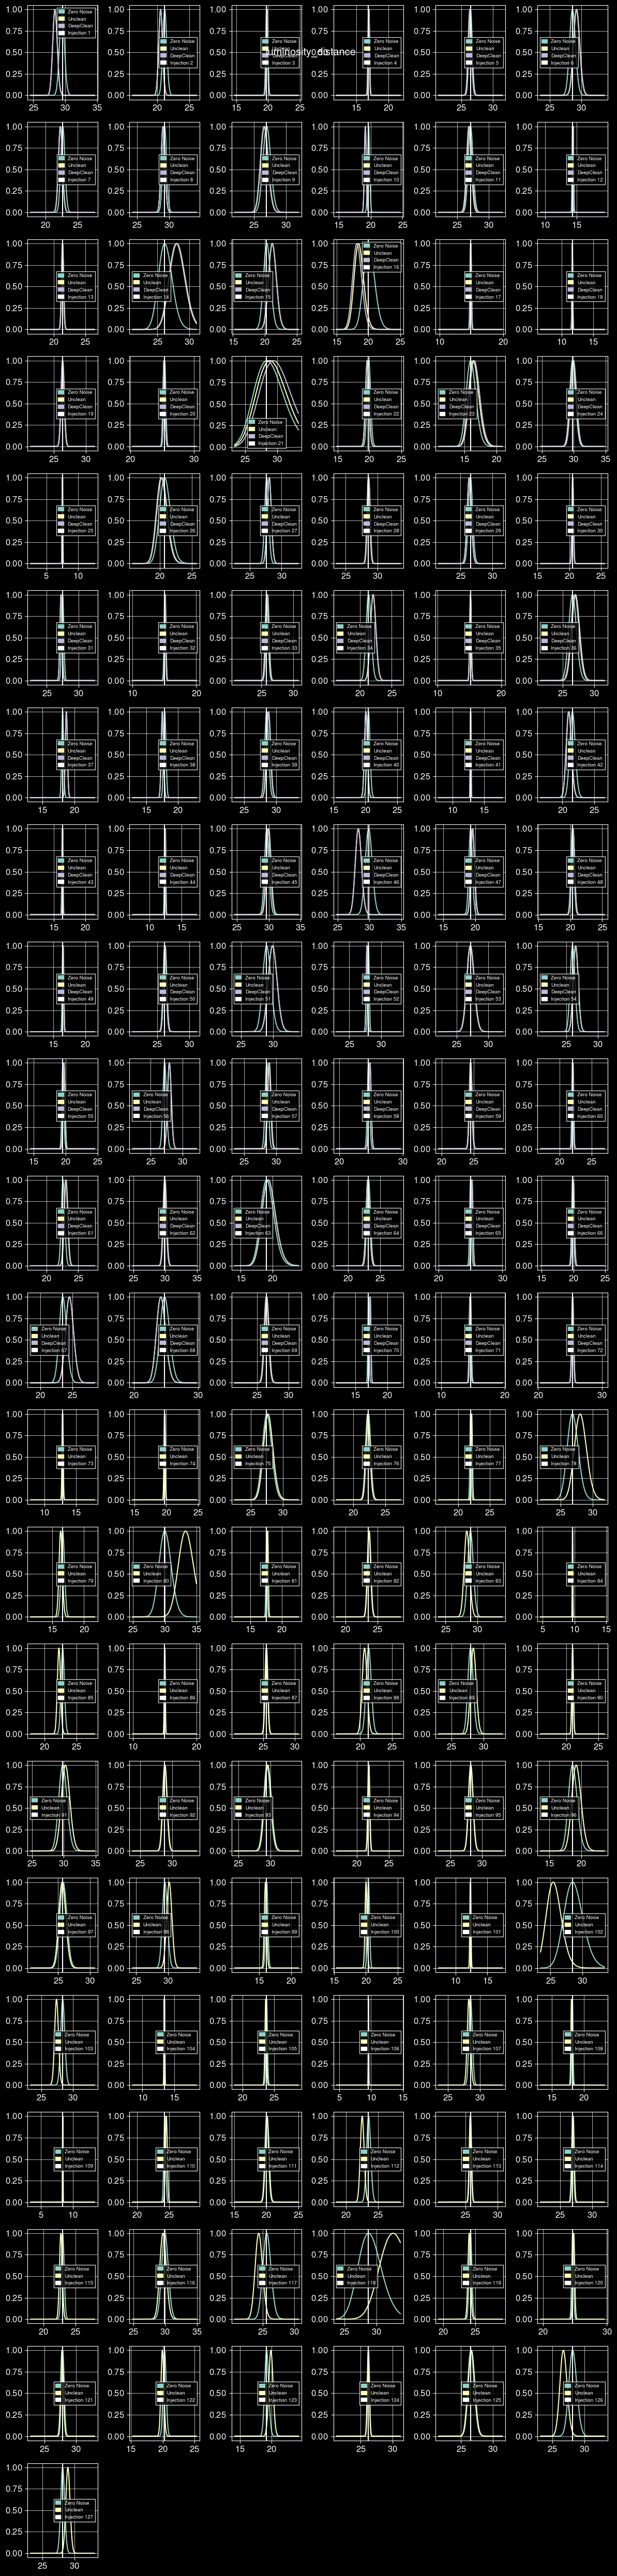

In [19]:
param = 'luminosity_distance'
plt.figure(figsize=(12,50))
for i in range(1,128):
    plt.subplot(22,6,i)
    try:
        with open(f"posteriors/zero_noise/results_{i}.pkl", 'rb') as file:
            loaded_data = pickle.load(file)
            plt.plot(loaded_data[f'grid_{param}'], loaded_data[f'pdf_{param}'], label = "Zero Noise")
    except:
        pass

    try:
        with open(f"posteriors/unclean/results_{i}.pkl", 'rb') as file:
            loaded_data = pickle.load(file)
            plt.plot(loaded_data[f'grid_{param}'], loaded_data[f'pdf_{param}'], label = "Unclean")
    except:
        pass
    try:
        with open(f"posteriors/deepclean/results_{i}.pkl", 'rb') as file:
            loaded_data = pickle.load(file)
            plt.plot(loaded_data[f'grid_{param}'], loaded_data[f'pdf_{param}'], label = "DeepClean")
    except:
        pass
    try:
        plt.axvline(loaded_data[f'inj_{param}'], label=f"Injection {i}")
        plt.legend(fontsize=7)
        #plt.xlabel(param)
    except:
        pass
    
plt.tight_layout() 
plt.suptitle(param)
plt.savefig(f"posteriors_{param}.pdf")

## credible levels from zero noise injections

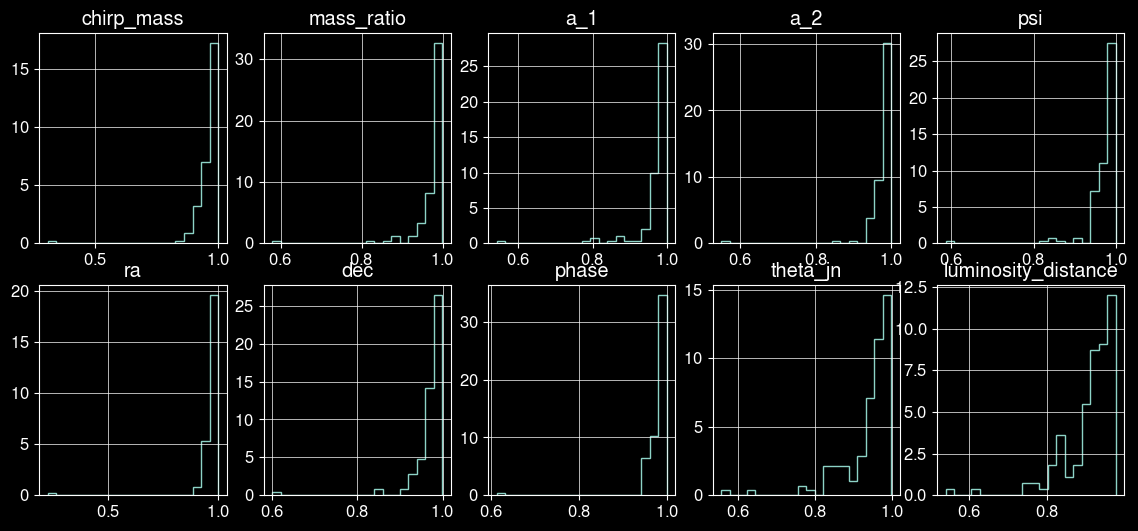

In [70]:
plt.figure(figsize=(14,6))
for k, param in enumerate(param_list):
    credible_levels = []
    for i in range(1, 128):
        with open(f"posteriors/zero_noise/results_{i}.pkl", 'rb') as file:
            loaded_data = pickle.load(file)
        pdf_interp = interp1d(loaded_data[f'grid_{param}'], loaded_data[f'pdf_{param}'])
        cl = compute_injection_credible_level(pdf_interp.x, pdf_interp.y, loaded_data[f'inj_{param}'])    
        credible_levels.append(cl)

    plt.subplot(2,5,k+1)
    plt.hist(credible_levels, 20, histtype='step', density=True)
    plt.title(param)

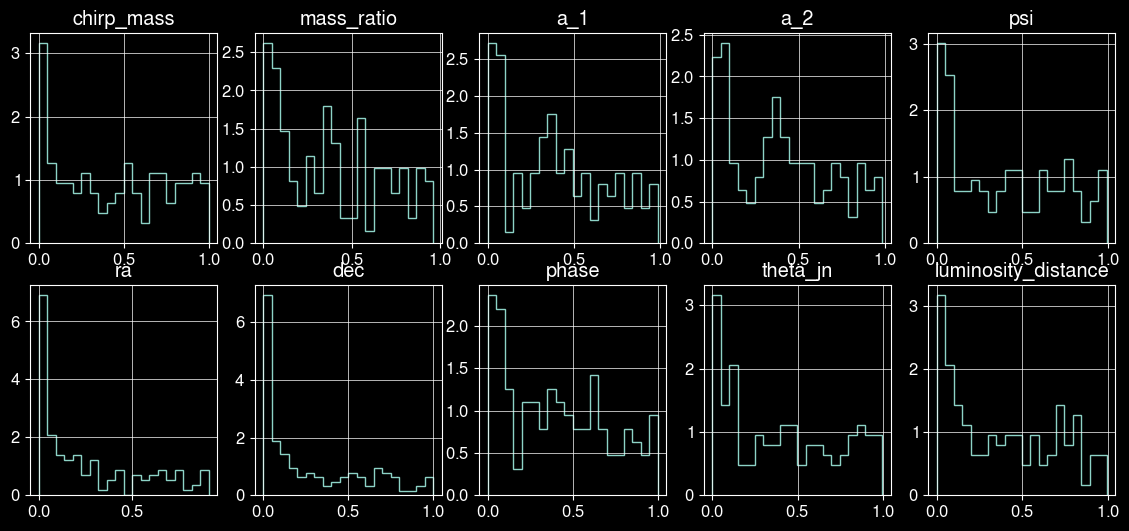

In [71]:
plt.figure(figsize=(14,6))
for k, param in enumerate(param_list):
    credible_levels = []
    for i in range(1, 128):
        with open(f"posteriors/unclean/results_{i}.pkl", 'rb') as file:
            loaded_data = pickle.load(file)
        pdf_interp = interp1d(loaded_data[f'grid_{param}'], loaded_data[f'pdf_{param}'])
        cl = compute_injection_credible_level(pdf_interp.x, pdf_interp.y, loaded_data[f'inj_{param}'])    
        credible_levels.append(cl)

    plt.subplot(2,5,k+1)
    plt.hist(credible_levels, 20, histtype='step', density=True)
    plt.title(param)

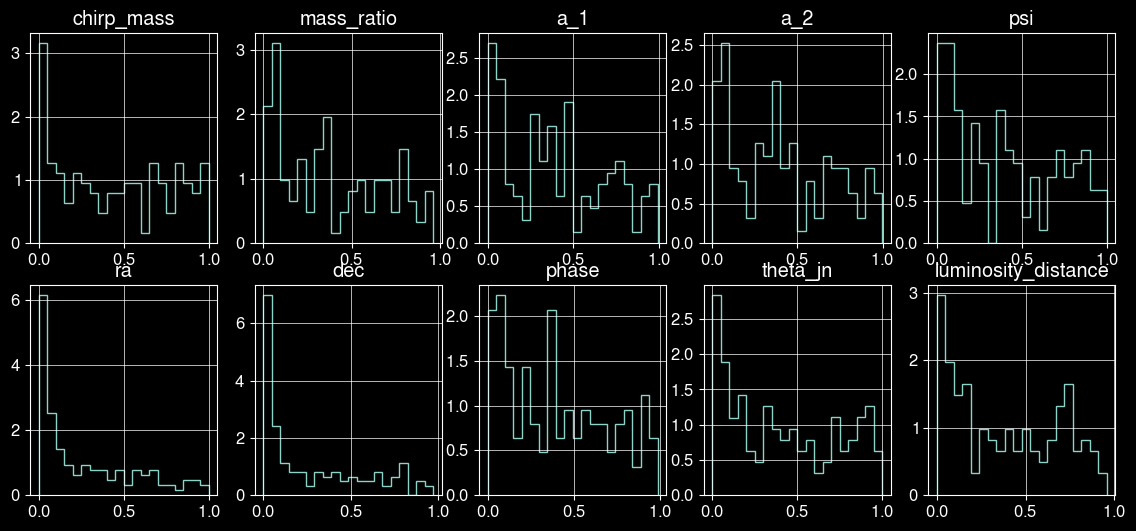

In [72]:
plt.figure(figsize=(14,6))
for k, param in enumerate(param_list):
    credible_levels = []
    for i in range(1, 128):
        with open(f"posteriors/deepclean/results_{i}.pkl", 'rb') as file:
            loaded_data = pickle.load(file)
        pdf_interp = interp1d(loaded_data[f'grid_{param}'], loaded_data[f'pdf_{param}'])
        cl = compute_injection_credible_level(pdf_interp.x, pdf_interp.y, loaded_data[f'inj_{param}'])    
        credible_levels.append(cl)

    plt.subplot(2,5,k+1)
    plt.hist(credible_levels, 20, histtype='step', density=True)
    plt.title(param)

In [78]:
dict_of_dicts = {}


# Iterate through all parameters
for param in param_list:
    credible_level_dict = {}
    
    # Process 'Unclean' data
    credible_levels = []
    for i in range(1, 128):
        with open(f"posteriors/unclean/results_{i}.pkl", 'rb') as file:
            loaded_data = pickle.load(file)
        pdf_interp = interp1d(loaded_data[f'grid_{param}'], loaded_data[f'pdf_{param}'])
        cl = compute_injection_credible_level(pdf_interp.x, pdf_interp.y, loaded_data[f'inj_{param}'])    
        credible_levels.append(cl)
    credible_level_dict['Unclean'] = credible_levels

    # Process 'DeepClean' data
    credible_levels = []
    for i in range(1, 128):
        with open(f"posteriors/deepclean/results_{i}.pkl", 'rb') as file:
            loaded_data = pickle.load(file)
        pdf_interp = interp1d(loaded_data[f'grid_{param}'], loaded_data[f'pdf_{param}'])
        cl = compute_injection_credible_level(pdf_interp.x, pdf_interp.y, loaded_data[f'inj_{param}'])    
        credible_levels.append(cl)
    credible_level_dict['DeepClean'] = credible_levels

    # Add the credible level dictionary to the top-level dictionary
    dict_of_dicts[param] = credible_level_dict


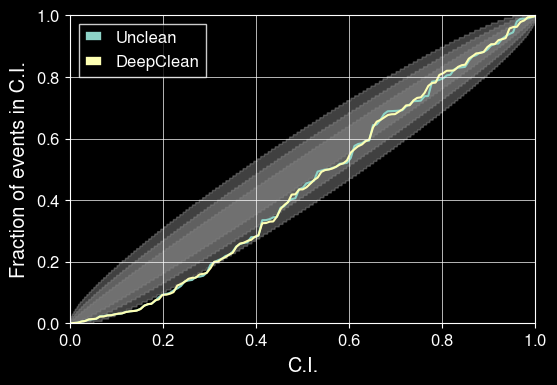

In [79]:
#x, y = make_pp_plot_data (credible_levels, resolution = 1000)
#x_values, y_lower, y_upper = get_pp_plot_errorbar_data (len(credible_levels), confidence_interval = 0.9, resolution = 1000)

make_pp_plot (dict_of_dicts['chirp_mass'], resolution = 1000, filename = None)

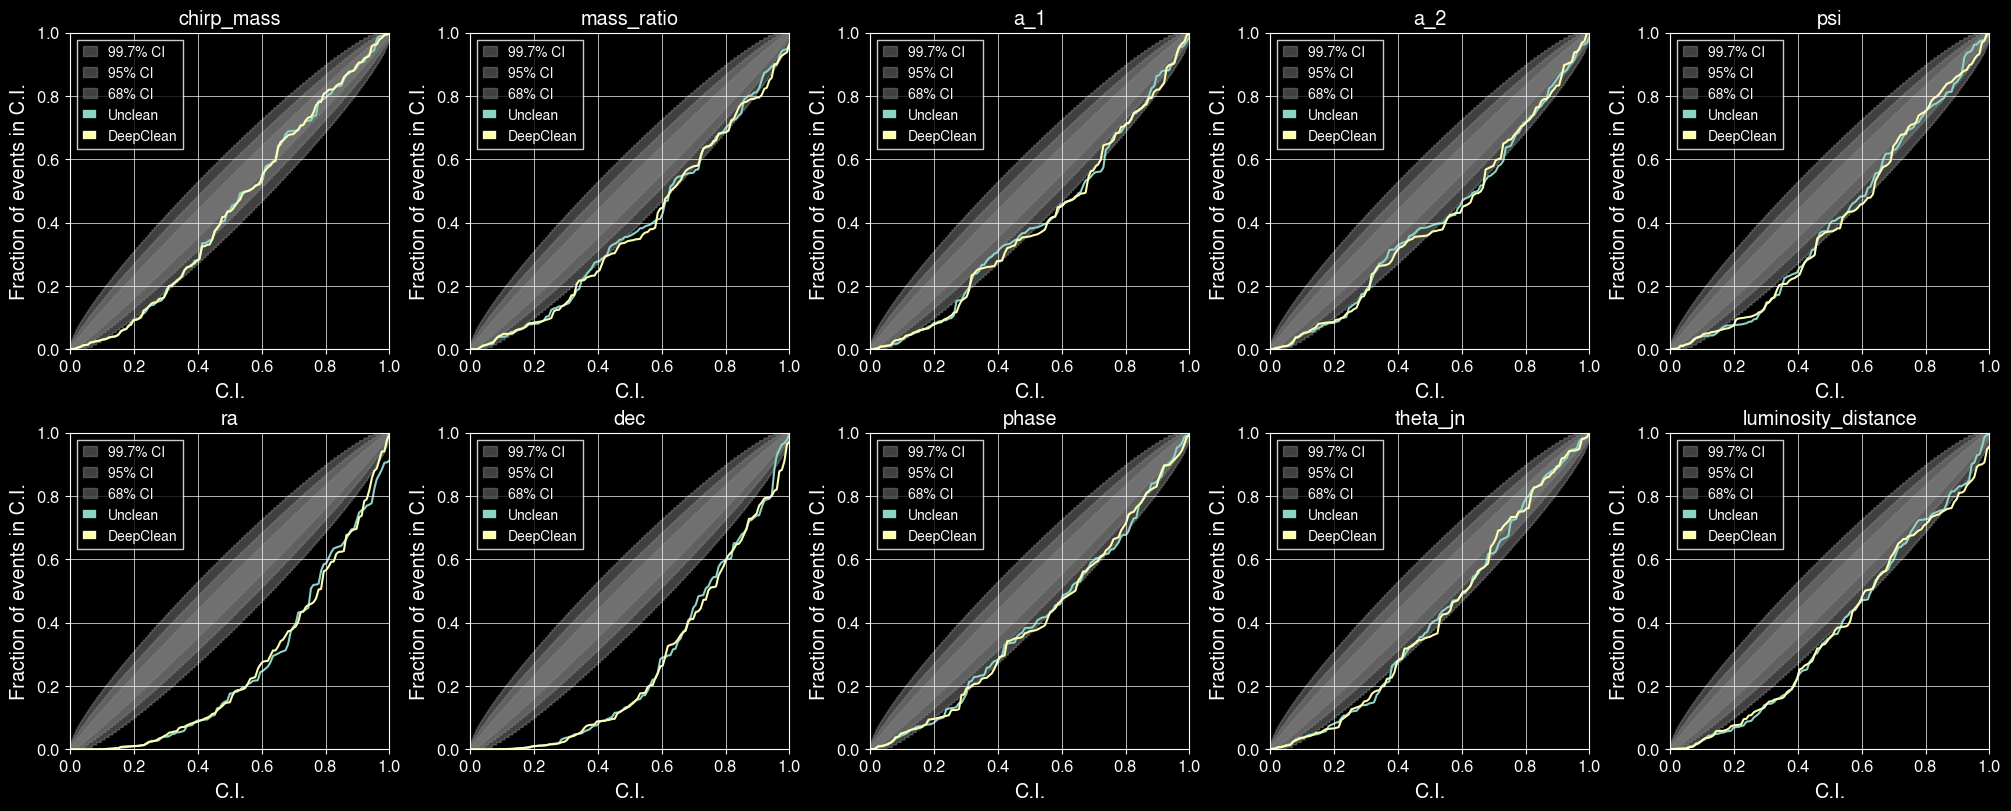

In [84]:
make_multiple_pp_plots_from_dict_of_dicts(dict_of_dicts, resolution=1000, filenames=None)


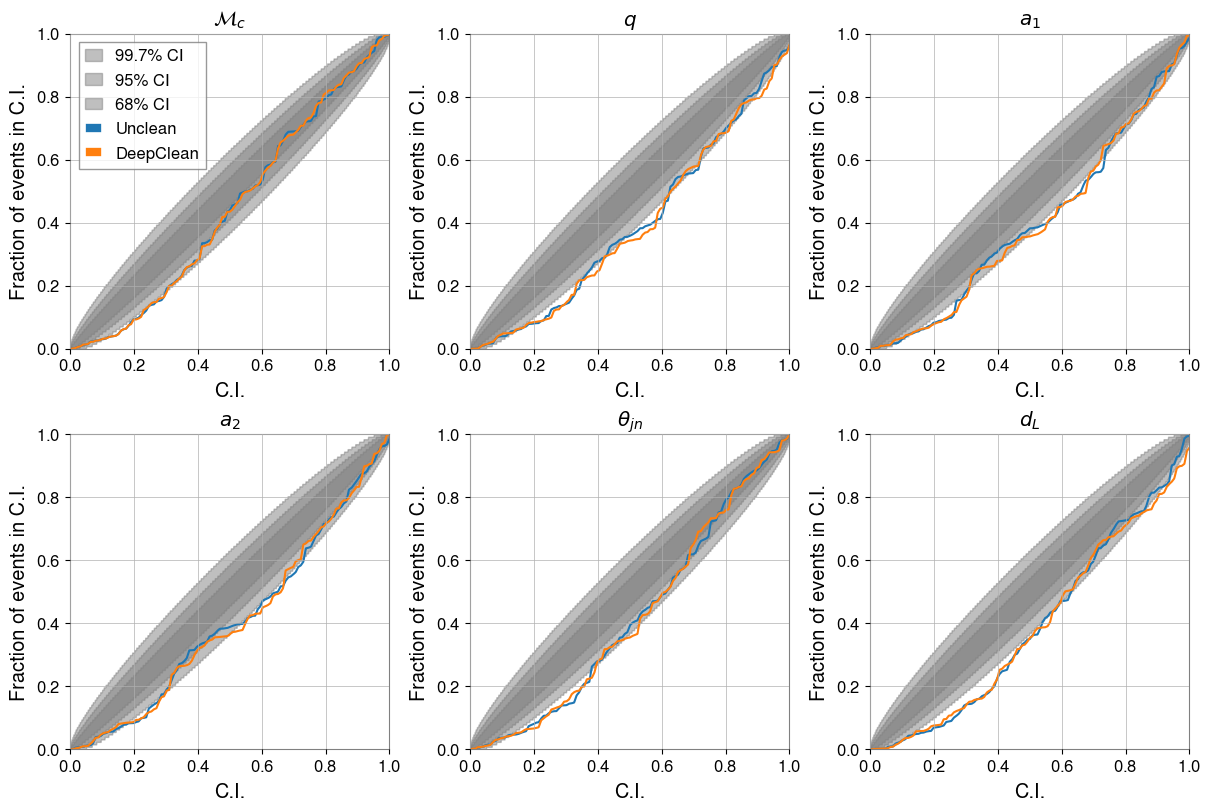

In [92]:


dict_of_dicts = {}
param_list_short = ['chirp_mass','mass_ratio', 'a_1', 'a_2', 'theta_jn', 'luminosity_distance']
param_labels = [r"$\mathcal{M}_c$", r"$q$", r"$a_1$", r"$a_2$", r"$\theta_{jn}$", r"$d_L$"]

# Iterate through all parameters
for k, param in enumerate(param_list_short):
    credible_level_dict = {}
    
    # Process 'Unclean' data
    credible_levels = []
    for i in range(1, 128):
        with open(f"posteriors/unclean/results_{i}.pkl", 'rb') as file:
            loaded_data = pickle.load(file)
        pdf_interp = interp1d(loaded_data[f'grid_{param}'], loaded_data[f'pdf_{param}'])
        cl = compute_injection_credible_level(pdf_interp.x, pdf_interp.y, loaded_data[f'inj_{param}'])    
        credible_levels.append(cl)
    credible_level_dict['Unclean'] = credible_levels

    # Process 'DeepClean' data
    credible_levels = []
    for i in range(1, 128):
        with open(f"posteriors/deepclean/results_{i}.pkl", 'rb') as file:
            loaded_data = pickle.load(file)
        pdf_interp = interp1d(loaded_data[f'grid_{param}'], loaded_data[f'pdf_{param}'])
        cl = compute_injection_credible_level(pdf_interp.x, pdf_interp.y, loaded_data[f'inj_{param}'])    
        credible_levels.append(cl)
    credible_level_dict['DeepClean'] = credible_levels

    # Add the credible level dictionary to the top-level dictionary
    dict_of_dicts[param_labels[k]] = credible_level_dict

make_multiple_pp_plots_from_dict_of_dicts(dict_of_dicts, resolution=1000, filename="pp_plot-6-params.pdf")


## There are deviations away from the true values more than what is expected due to noise

We have seen that there are biases still existing even in the zero noise tests which must be some inconsistency between the injection framework used and the analysis framework. So the easiest way to fix this is to consider whatever is recovered from the zero noise pe analysis to be the true values. Below we consider this but we eventually see that it does not help. This should be attrubuted to the fact that the data is non-Gaussian and we have not done any glitch mitigation on this data which can lead to biased posteriors. 

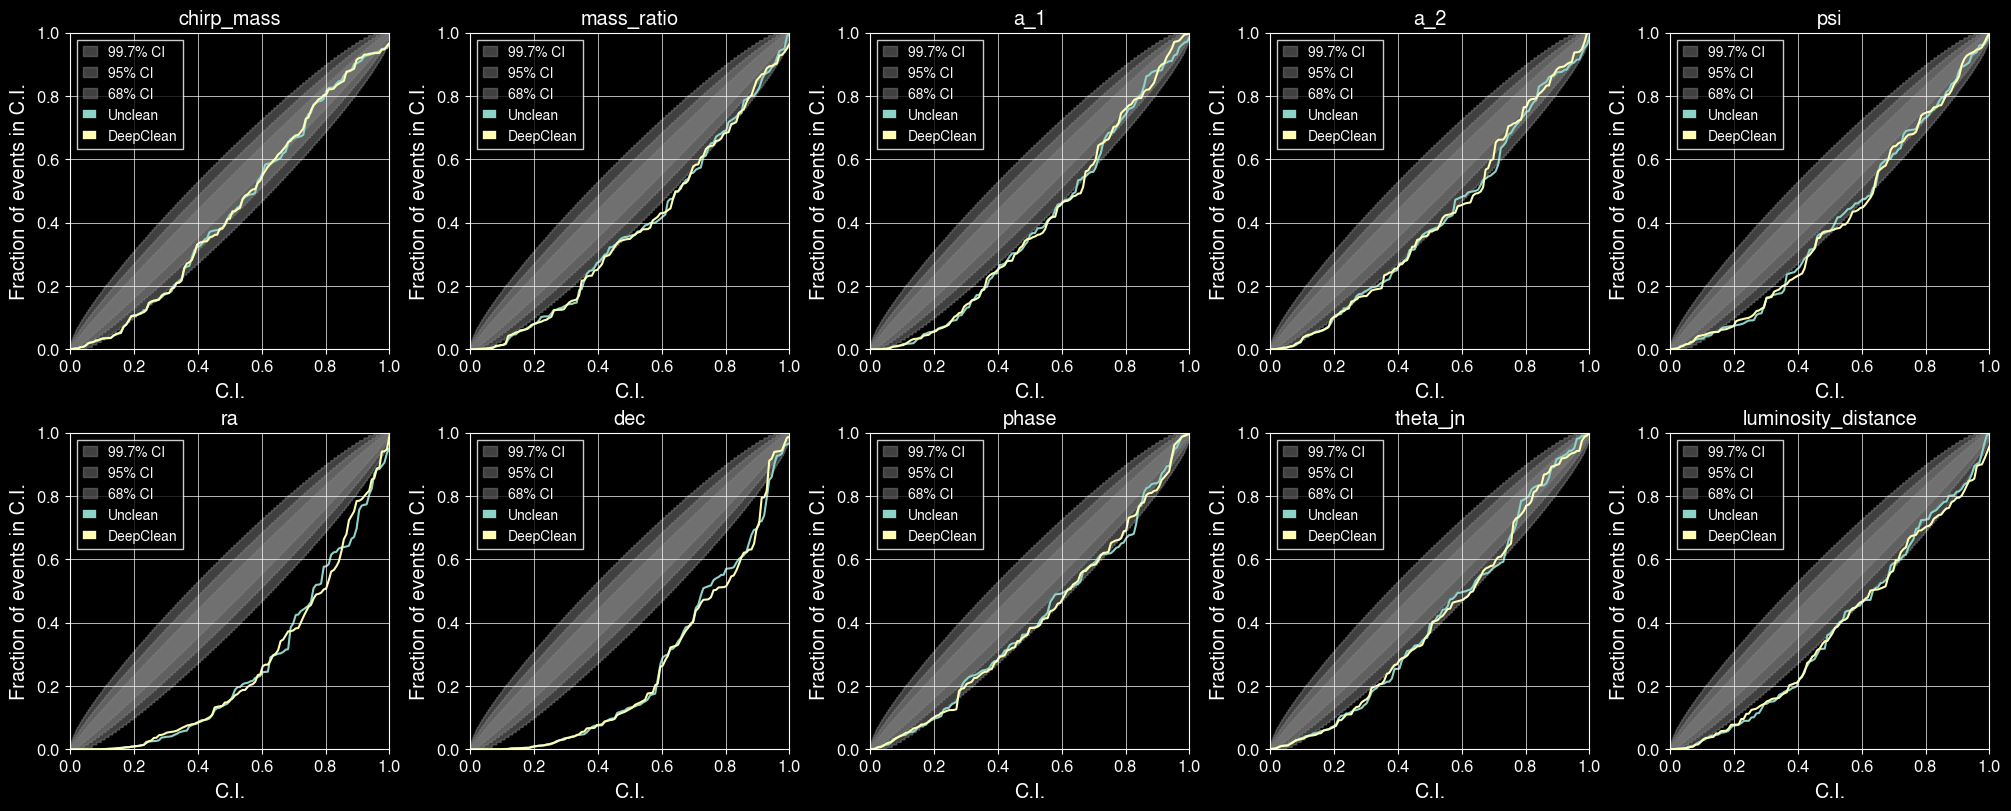

In [90]:
dict_of_dicts = {}

# Iterate through all parameters
for param in param_list:
    credible_level_dict = {}
    
    # find the recalibrated injection parameters using zero noise pe
    inj_values_recalibrated = np.zeros(128)
    for i in range(1, 128):
        with open(f"posteriors/zero_noise/results_{i}.pkl", 'rb') as file:
            loaded_data = pickle.load(file)
        pdf_interp = interp1d(loaded_data[f'grid_{param}'], loaded_data[f'pdf_{param}'])
        inj_values_recalibrated[i] = pdf_interp.x[np.argmax(pdf_interp.y)]

    
    # Process 'Unclean' data
    credible_levels = []
    for i in range(1, 128):
        with open(f"posteriors/unclean/results_{i}.pkl", 'rb') as file:
            loaded_data = pickle.load(file)
        pdf_interp = interp1d(loaded_data[f'grid_{param}'], loaded_data[f'pdf_{param}'])
        
        cl = compute_injection_credible_level(pdf_interp.x, pdf_interp.y, inj_values_recalibrated[i])    
        credible_levels.append(cl)
    credible_level_dict['Unclean'] = credible_levels

    # Process 'DeepClean' data
    credible_levels = []
    for i in range(1, 128):
        with open(f"posteriors/deepclean/results_{i}.pkl", 'rb') as file:
            loaded_data = pickle.load(file)
        pdf_interp = interp1d(loaded_data[f'grid_{param}'], loaded_data[f'pdf_{param}'])
        cl = compute_injection_credible_level(pdf_interp.x, pdf_interp.y, inj_values_recalibrated[i])    
        credible_levels.append(cl)
    credible_level_dict['DeepClean'] = credible_levels

    # Add the credible level dictionary to the top-level dictionary
    dict_of_dicts[param] = credible_level_dict

make_multiple_pp_plots_from_dict_of_dicts(dict_of_dicts, resolution=1000, filenames=None)


In [16]:
pdf_interp = interp1d(loaded_data[f'grid_{param}'], loaded_data[f'pdf_{param}'])
cdf = np.cumsum(loaded_data[f'pdf_{param}'])/max(np.cumsum(loaded_data[f'pdf_{param}']))
cdf_interp = interp1d(loaded_data[f'grid_{param}'], cdf )

In [17]:
pdf_interp.x[np.argmax(pdf_interp.y)], loaded_data[f'inj_{param}']

(29.108400294862, 28.18185605446133)

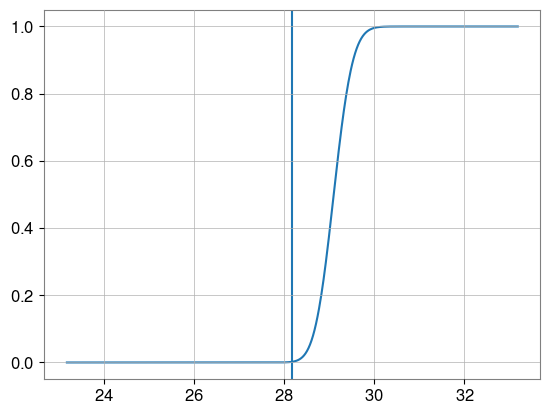

In [18]:
plt.plot(cdf_interp.x, cdf_interp.y)
plt.axvline(loaded_data[f'inj_{param}'])

In [40]:
compute_injection_credible_level (pdf_interp.x, pdf_interp.y, loaded_data[f'inj_{param}'])

array(0.00934823)

## Error bars comparison for each parameter

In [19]:
pdf_interp.x, cdf_interp.y

(array([23.18185605, 23.19855055, 23.21524504, ..., 33.14846707,
        33.16516156, 33.18185605]),
 array([1.79274492e-111, 1.23567091e-110, 7.40592456e-110, ...,
        1.00000000e+000, 1.00000000e+000, 1.00000000e+000]))

In [20]:
max(cdf_interp.y)

1.0

In [27]:
def get_CI (x, pdf, CI=0.9):
    cdf = np.cumsum(pdf)
    cdf = cdf/max(cdf)
    cdf_interp = interp1d(cdf, x)
    left = (1-CI)/2
    right = left + CI
    return cdf_interp(np.array([left, right]))

def get_CI_width(x, pdf, CI=0.9):
    ci = get_CI (x, pdf, CI=0.9)
    width = ci[1] - ci[0]
    return width
    

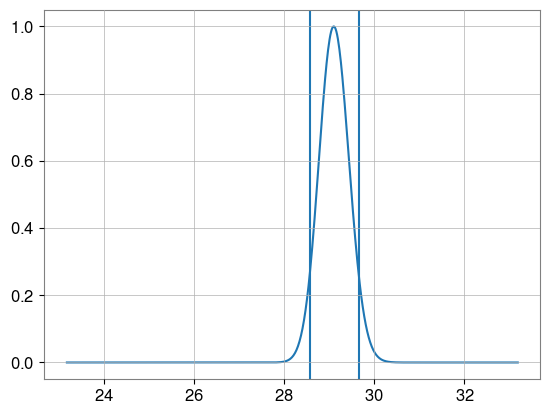

In [28]:
plt.plot(pdf_interp.x, pdf_interp.y)
ci = get_CI (pdf_interp.x, pdf_interp.y, CI=0.9)
plt.axvline(ci[0])
plt.axvline(ci[1])


In [29]:
get_CI_width (pdf_interp.x, pdf_interp.y, CI=0.9)

1.0919707675586814

In [46]:
# Iterate through all parameters

ci_width_unclean_dict = {}
for param in ['chirp_mass','mass_ratio', 'a_1', 'a_2', 'theta_jn', 'luminosity_distance']:
    
    # find the recalibrated injection parameters using zero noise pe
    error_bars = []
    for i in range(1, 128):
        with open(f"posteriors/unclean/results_{i}.pkl", 'rb') as file:
            loaded_data = pickle.load(file)
        pdf_interp = interp1d(loaded_data[f'grid_{param}'], loaded_data[f'pdf_{param}'])
        error_bars.append(get_CI_width (pdf_interp.x, pdf_interp.y, CI=0.9))
    
    ci_width_unclean_dict[param] = np.array(error_bars)

In [47]:
ci_width_deepclean_dict = {}
for param in ['chirp_mass','mass_ratio', 'a_1', 'a_2', 'theta_jn', 'luminosity_distance']:
    
    # find the recalibrated injection parameters using zero noise pe
    error_bars = []
    for i in range(1, 128):
        with open(f"posteriors/deepclean/results_{i}.pkl", 'rb') as file:
            loaded_data = pickle.load(file)
        pdf_interp = interp1d(loaded_data[f'grid_{param}'], loaded_data[f'pdf_{param}'])
        error_bars.append(get_CI_width (pdf_interp.x, pdf_interp.y, CI=0.9))
    
    ci_width_deepclean_dict[param] = np.array(error_bars)
    
        

-0.2023368757525223 0.4496537654220539
-2.683452761068413 4.97068224635856
-11.460619525761237 3.5571119895380985
-2.975315581187409 4.798839857862623
-8.694819465905422 10.188979146280627
-4.711778474594568 5.4642666680009695


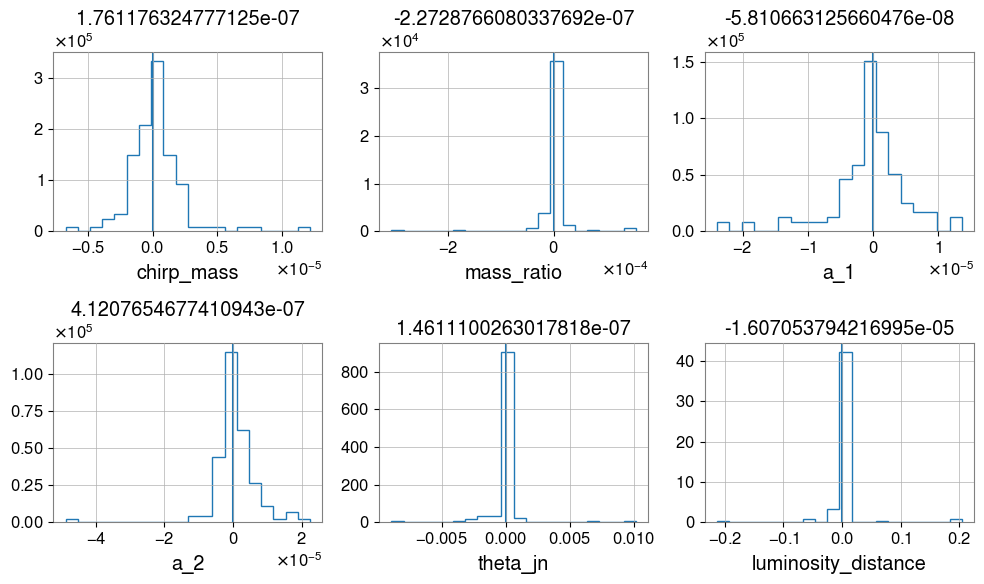

In [55]:
param_list_short = ['chirp_mass','mass_ratio', 'a_1', 'a_2', 'theta_jn', 'luminosity_distance'] 

plt.figure(figsize=(10,6))
for k, param in enumerate(param_list_short):
    plt.subplot(2,3,k+1)
    diff = ci_width_unclean_dict[param] - ci_width_deepclean_dict[param]
    perc_diff = diff/ci_width_unclean_dict[param] * 100
    print(min(perc_diff), max(perc_diff))
    plt.hist(diff, 20, density=True, histtype='step')
    plt.axvline(0)
    plt.xlabel(param)
    plt.title(f"{np.median(diff)}")
plt.tight_layout()

In [45]:
ci_width_deepclean_dict

{'luminosity_distance': array([1.1758994 , 0.98406526, 0.45761406, 0.34815202,
        0.85095311, 1.61402615, 1.04356002, 1.00783195,
        1.97867806, 0.49174915, 1.23371704, 0.21684721,
        0.53399886, 3.92693843, 2.02138483, 2.35489382,
        0.3157598 , 0.20197721, 0.82490491, 0.53695009,
        6.7024559 , 0.91825826, 2.72005415, 1.52984949,
        0.13906199, 2.73900383, 1.06562138, 0.73834333,
        1.08820439, 0.38146617, 0.56714134, 0.37480704,
        0.79209655, 1.40749147, 0.41143277, 2.03929059,
        0.53810694, 0.58560871, 1.03621629, 0.76203019,
        0.18451984, 1.35549833, 0.19483141, 0.22223582,
        1.20805601, 1.61049219, 0.95726564, 0.81614836,
        0.31434831, 0.83619542, 2.27166243, 0.39511303,
        1.91349327, 1.28133449, 0.51453281, 0.98117679,
        0.85347881, 0.61666432, 0.69653866, 0.34485675,
        0.92389399, 0.85183175, 3.54926892, 0.94016468,
        0.46421291, 0.53937372, 2.09680126, 2.36586519,
        1.15068409, 0.348

## Example pe for plotting 

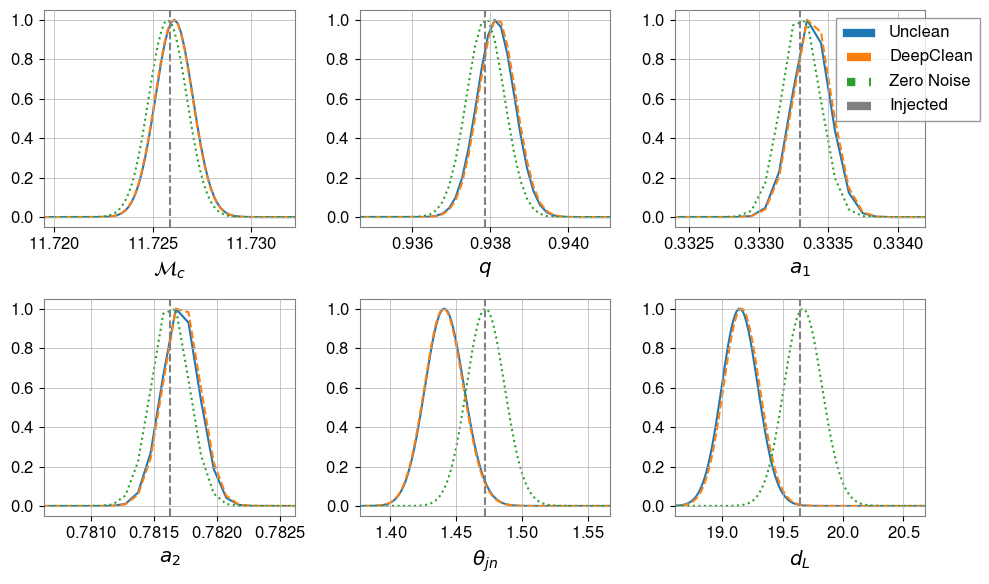

In [82]:
plt.figure(figsize=(10,6))

inj_idx = 10 
for k, param in enumerate(param_list_short):

    plt.subplot(2,3,k+1)

    with open(f"posteriors/unclean/results_{inj_idx}.pkl", 'rb') as file:
        loaded_data = pickle.load(file)
    plt.plot(loaded_data[f'grid_{param}'], loaded_data[f'pdf_{param}'], label = "Unclean", ls = 'solid')

    with open(f"posteriors/deepclean/results_{inj_idx}.pkl", 'rb') as file:
        loaded_data = pickle.load(file)
    plt.plot(loaded_data[f'grid_{param}'], loaded_data[f'pdf_{param}'], label = "DeepClean", ls = 'dashed')

    with open(f"posteriors/zero_noise/results_{inj_idx}.pkl", 'rb') as file:
        loaded_data = pickle.load(file)
    plt.plot(loaded_data[f'grid_{param}'], loaded_data[f'pdf_{param}'], label = "Zero Noise", ls = 'dotted')
        

    plt.axvline(loaded_data[f'inj_{param}'], color = 'grey', ls = 'dashed', label = "Injected")
    
    pdf_interp = interp1d(loaded_data[f'grid_{param}'], loaded_data[f'pdf_{param}'])
    width = get_CI_width(loaded_data[f'grid_{param}'], loaded_data[f'pdf_{param}'], CI=0.999)
    x_min = loaded_data[f'inj_{param}'] - 2*width
    x_max = loaded_data[f'inj_{param}'] + 2*width
    plt.xlim(x_min, x_max)

    plt.xlabel(param_labels[k])
    #plt.axvline(loaded_data[f'inj_{param}'], label=f"Injection {i}")
    if k==2:
        plt.legend(fontsize=12, loc='upper right', 
                   frameon=True, handlelength=2, handleheight=0.01, bbox_to_anchor=(1.25, 1))




plt.tight_layout() 
#plt.suptitle(param)
plt.savefig(f"posteriors_all_params.pdf")

In [70]:
param_list_short

['chirp_mass', 'mass_ratio', 'a_1', 'a_2', 'theta_jn', 'luminosity_distance']